In [67]:
# import all necessary references
import pandas as pd
import importlib.metadata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml
from pprint import pprint
from math import floor


print(

    f"""
Pandas version: {pd.__version__}
Matplotlib Pyplot version: {importlib.metadata.version("matplotlib")}
Seaborn version: {sns.__version__}
PyYAML version: {yaml.__version__}    
    """
)


Pandas version: 2.0.0
Matplotlib Pyplot version: 3.7.1
Seaborn version: 0.12.2
PyYAML version: 6.0    
    


In [2]:
pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_colwidth", None)
%matplotlib widget

In [3]:
# Criar as referências para os arquivos
from pathlib import PurePath

raw_application_test_file_path = "../../data/01_raw/application_test.csv"
raw_application_train_file_path = "../../data/01_raw/application_train.csv"
raw_bureau_file_path = "../../data/01_raw/bureau.csv"
raw_bureau_balance_file_path = "../../data/01_raw/bureau_balance.csv"
raw_bureau_credit_card_balance_file_path = "../../data/01_raw/credit_card_balance.csv"
raw_installments_payments_file_path = "../../data/01_raw/credit_card_balance.csv"
raw_pos_cash_balance_file_path = "../../data/01_raw/POS_CASH_balance.csv"
raw_previous_application_file_path = "../../data/01_raw/previous_application.csv"
raw_sample_submission_file_path = "../../data/01_raw/sample_submission.csv"
home_credit_columns_description_file_path = "../../data/01_raw/HomeCredit_columns_description.csv"


raw_application_test_file = PurePath(raw_application_test_file_path)
raw_application_train_file = PurePath(raw_application_train_file_path)
raw_bureau_file = PurePath(raw_bureau_file_path)
raw_bureau_balance_file = PurePath(raw_bureau_balance_file_path)
raw_bureau_credit_card_balance_file = PurePath(raw_bureau_credit_card_balance_file_path)
raw_installments_payments_file = PurePath(raw_installments_payments_file_path)
raw_pos_cash_balance_file = PurePath(raw_pos_cash_balance_file_path)
raw_previous_application_file = PurePath(raw_previous_application_file_path)
raw_sample_submission_file = PurePath(raw_sample_submission_file_path)
home_credit_columns_description_file = PurePath(home_credit_columns_description_file_path)

project_parameters_file = PurePath("../../conf/base/parameters.yml")

In [4]:
with open(project_parameters_file, "r") as file:
    project_parameters = yaml.safe_load(file)

pprint(project_parameters)

{'dataset_variables_types': {'application_test': {'categorical_nominal': ['FONDKAPREMONT_MODE',
                                                                          'FLAG_EMAIL',
                                                                          'WEEKDAY_APPR_PROCESS_START',
                                                                          'CODE_GENDER',
                                                                          'NAME_TYPE_SUITE',
                                                                          'FLAG_MOBIL',
                                                                          'NAME_EDUCATION_TYPE',
                                                                          'FLAG_PHONE',
                                                                          'EMERGENCYSTATE_MODE',
                                                                          'FLAG_OWN_REALTY',
                                                                   

In [5]:
raw_application_train_df = pd.read_csv(
    filepath_or_buffer=raw_application_train_file,
    index_col="SK_ID_CURR",
    parse_dates=True,
    engine="pyarrow",
    # dtype_backend="pyarrow",
    encoding='unicode_escape'
)

In [6]:
raw_application_train_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

In [7]:
raw_application_train_df.isnull().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [8]:
application_train_vars_types = project_parameters["dataset_variables_types"]["application_train"]

In [9]:
application_train_cat_nominal_df = raw_application_train_df[application_train_vars_types["categorical_nominal"]]
application_train_cat_ordinal_df = raw_application_train_df[application_train_vars_types["categorical_ordinal"]]
application_train_num_continuous_df = raw_application_train_df[application_train_vars_types["numerical_continuous"]]
application_train_num_discrete_df = raw_application_train_df[application_train_vars_types["numerical_discrete"]]
application_train_datetime_df = raw_application_train_df[application_train_vars_types["datetime"]]

In [10]:
application_train_cat_nominal_df.isna().sum().sort_index()

CODE_GENDER                   0
EMERGENCYSTATE_MODE           0
FLAG_CONT_MOBILE              0
FLAG_EMAIL                    0
FLAG_EMP_PHONE                0
FLAG_MOBIL                    0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
FLAG_PHONE                    0
FLAG_WORK_PHONE               0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
NAME_CONTRACT_TYPE            0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
NAME_INCOME_TYPE              0
NAME_TYPE_SUITE               0
WALLSMATERIAL_MODE            0
WEEKDAY_APPR_PROCESS_START    0
dtype: int64

In [11]:
application_train_cat_ordinal_df.isna().sum().sort_index()

REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
dtype: int64

In [12]:
application_train_num_continuous_df.isna().sum().sort_values()

REGION_POPULATION_RELATIVE           0
AMT_CREDIT                           0
AMT_INCOME_TOTAL                     0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
TOTALAREA_MODE                  148431
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_AVG     150007
FLOORSMAX_MODE                  153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_AVG                   153020
LIVINGAREA_AVG                  154350
LIVINGAREA_MODE                 154350
LIVINGAREA_MEDI                 154350
ENTRANCES_MEDI                  154828
ENTRANCES_AVG                   154828
ENTRANCES_MODE                  154828
APARTMENTS_AVG                  156061
APARTMENTS_MODE                 156061
APARTMENTS_MEDI                 156061
ELEVATORS_AVG                   163891
ELEVATORS_MODE                  163891
ELEVATORS_MEDI           

In [13]:
application_train_num_discrete_df.isna().sum().sort_values()

DAYS_BIRTH                        0
DAYS_ID_PUBLISH                   0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [14]:
application_train_cat_nominal_df.describe(include="all").T.sort_index()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMERGENCYSTATE_MODE,307511,3,No,159428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_CONT_MOBILE,307511.0,NaN,NaN,NaN,0.998133,0.043164,0.0,1.0,1.0,1.0,1.0
FLAG_EMAIL,307511.0,NaN,NaN,NaN,0.05672,0.231307,0.0,0.0,0.0,0.0,1.0
FLAG_EMP_PHONE,307511.0,NaN,NaN,NaN,0.819889,0.38428,0.0,1.0,1.0,1.0,1.0
FLAG_MOBIL,307511.0,NaN,NaN,NaN,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_PHONE,307511.0,NaN,NaN,NaN,0.281066,0.449521,0.0,0.0,0.0,1.0,1.0
FLAG_WORK_PHONE,307511.0,NaN,NaN,NaN,0.199368,0.399526,0.0,0.0,0.0,0.0,1.0


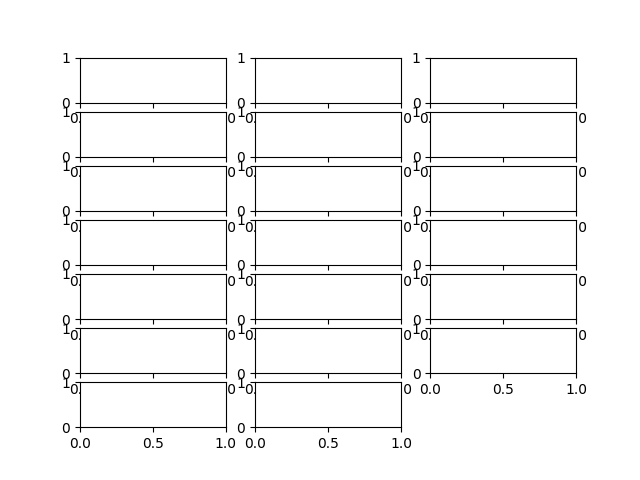

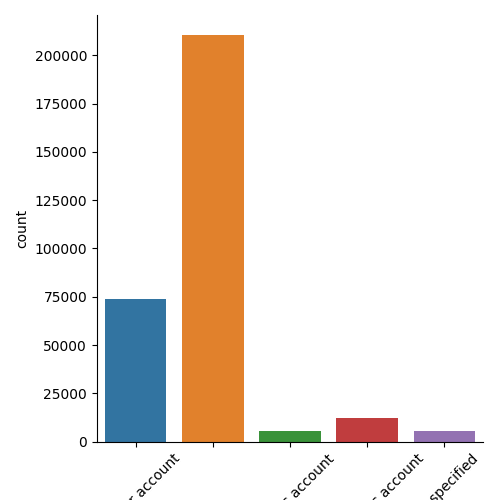

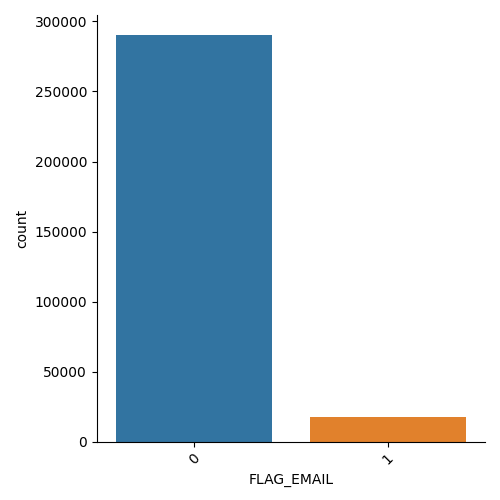

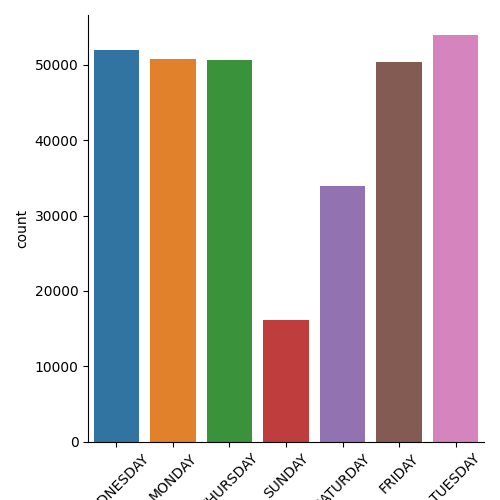

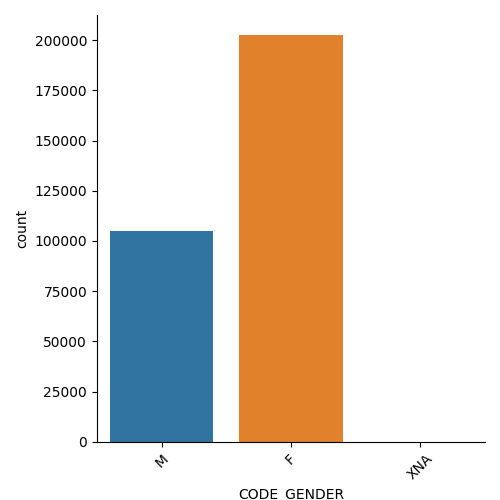

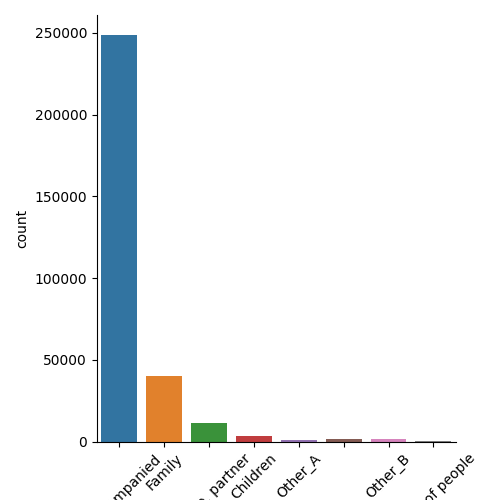

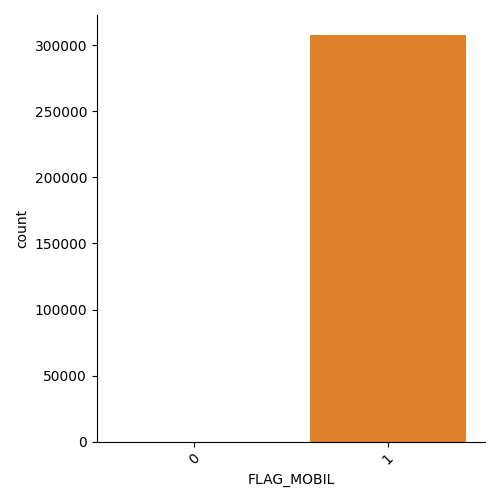

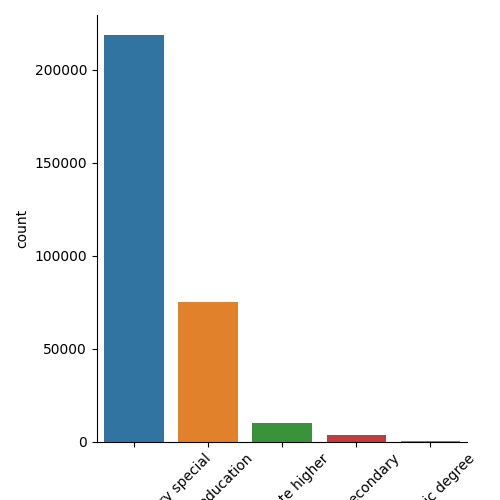

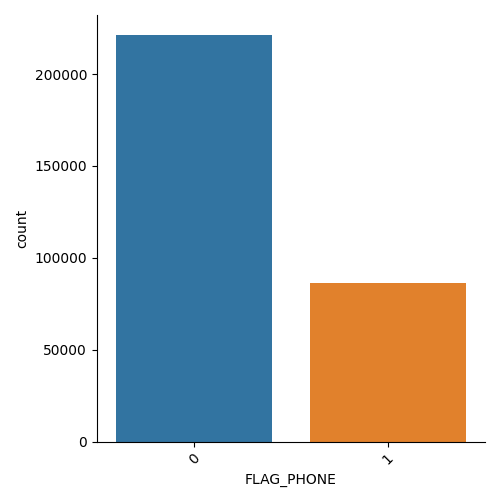

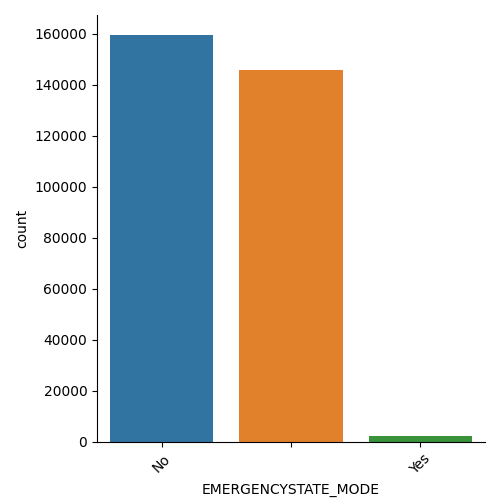

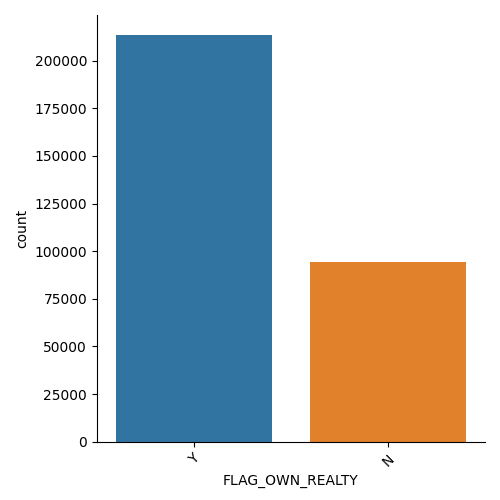

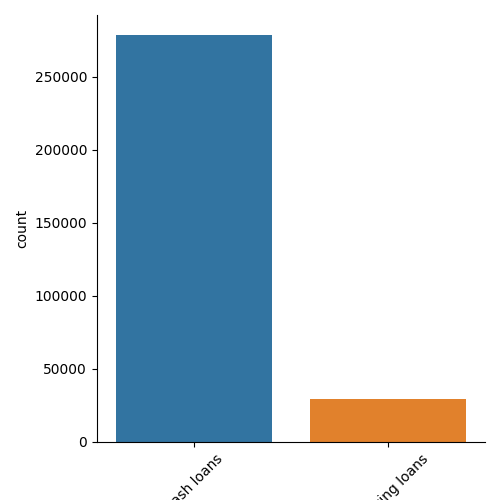

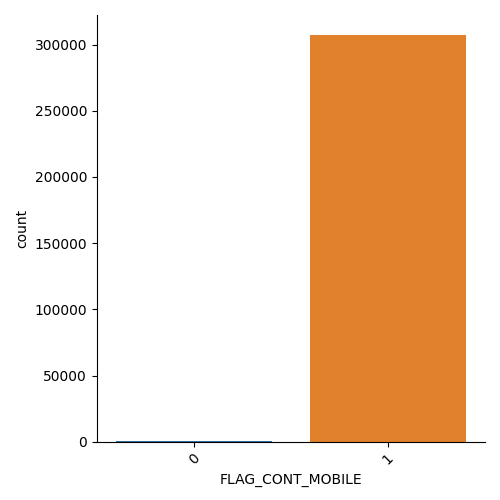

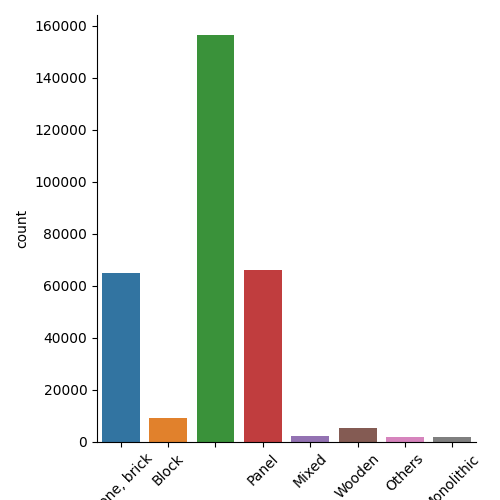

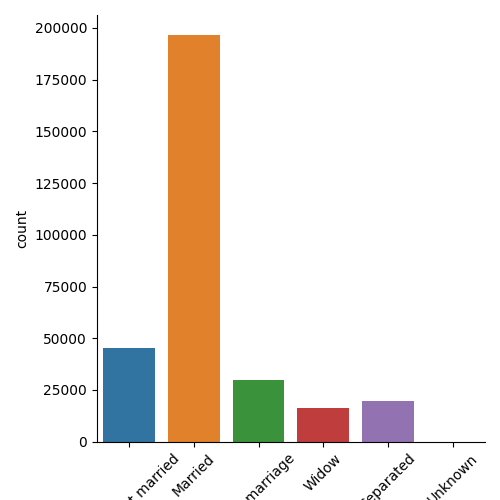

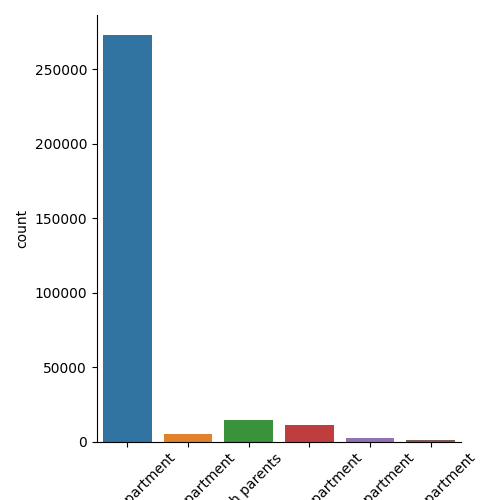

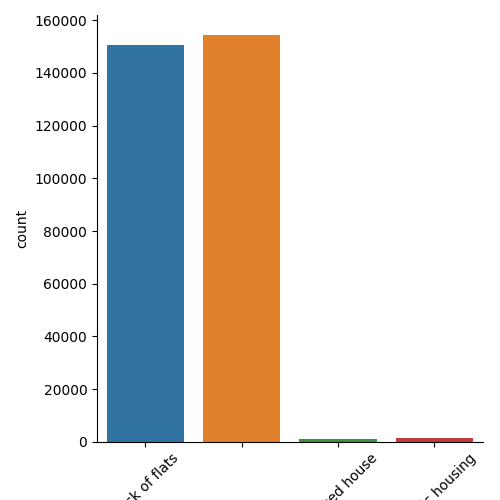

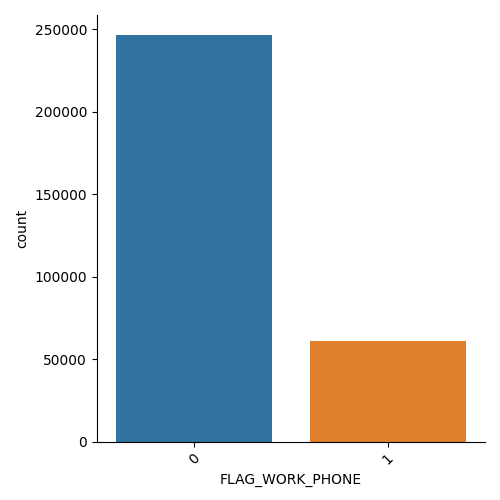

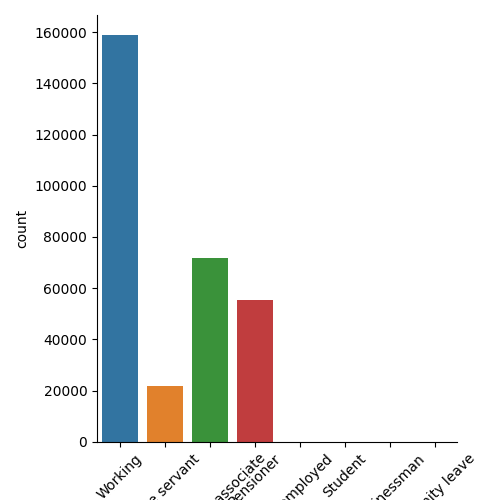

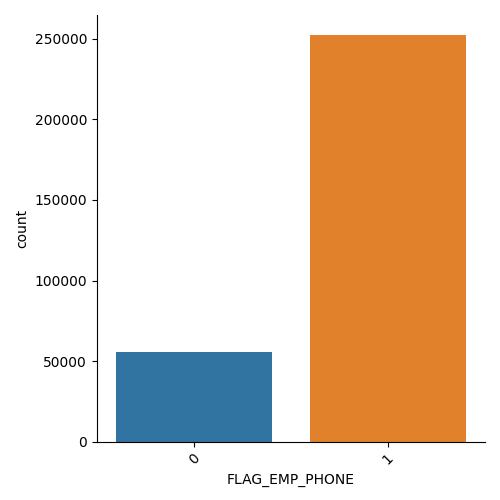

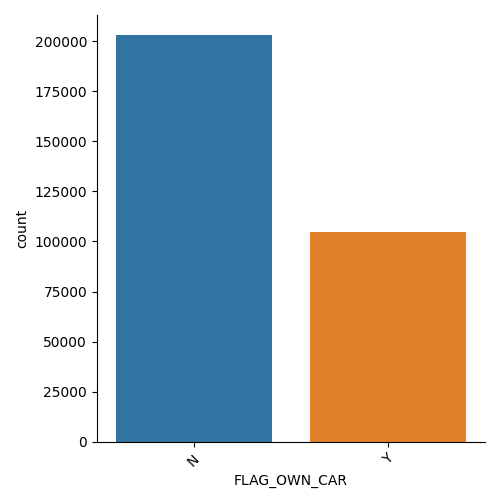

In [70]:
f = plt.figure()
gs = f.add_gridspec(round(len(application_train_cat_nominal_df.columns.to_list())/3), 3)
for idx, col in enumerate(application_train_cat_nominal_df.columns.to_list()):
    pos_x = floor(idx / 3)
    pos_y = idx % 3
    ax = f.add_subplot(gs[pos_x, pos_y])
    ax = sns.catplot(data=application_train_cat_nominal_df, kind='count', x=col)
    plt.xticks(rotation=45)


# g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
# g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

In [68]:


floor(3 / 3)

1